How often do fighters making a UFC debut win?

In [14]:
import pandas as pd

In [15]:
data = pd.read_csv('../../data/ufc-master.csv')

In [16]:
data = data[['B_fighter', 'R_fighter', 'B_wins', 'B_losses', 'R_wins', 'R_losses', 'B_draw', 'R_draw', 'gender', 'Winner']]

In [17]:
debut = (data['B_wins'] + data['B_losses'] == 0) | (data['R_wins'] + data['R_losses'] == 0)
data_debut = data[debut]

Now we exclude fights where both of the fighters are making their UFC debuts

In [18]:
noeq = data_debut['B_wins'] + data_debut['B_losses'] != data_debut['R_wins'] + data_debut['R_losses']
data_debut = data_debut[noeq]

In [19]:
wins = 0
for i in range(len(data_debut)):
    if (data_debut['Winner'].iloc[i] == 'Blue') & (data_debut['B_wins'].iloc[i] + data_debut['B_losses'].iloc[i] == 0):
        wins += 1
    elif (data_debut['Winner'].iloc[i] == 'Red') & (data_debut['R_wins'].iloc[i] + data_debut['R_losses'].iloc[i] == 0):
        wins += 1
p = wins / len(data_debut)
print("The fighter who is making the debut wins " + str(round(p * 100, 2)) + "% of the time.")
print("Number of fights where one of the fighters was making a UFC debut: " + str(len(data_debut)))

The fighter who is making the debut wins 43.37% of the time.
Number of fights where one of the fighters was making a UFC debut: 830


This shows us that it is usually better to prefer the fighter who has already fought in the UFC before. Because this is based on 830 fights we can call it more than just a random occurrence.

We can also ask ourselves if there are differences between male and female fighters?

In [20]:
male = data_debut['gender'] == 'MALE'
female = data_debut['gender'] == 'FEMALE'
data_male = data_debut[male].copy()
data_female = data_debut[female].copy()

In [21]:
wins_male = 0
for i in range(len(data_male)):
    if (data_male['Winner'].iloc[i] == 'Blue') & (data_male['B_wins'].iloc[i] + data_male['B_losses'].iloc[i] == 0):
        wins_male += 1
    elif (data_male['Winner'].iloc[i] == 'Red') & (data_male['R_wins'].iloc[i] + data_male['R_losses'].iloc[i] == 0):
        wins_male += 1
p2 = wins_male / len(data_male)
print("For male fighters the fighter making a debut wins " + str(round(p2 * 100, 2)) + "% of the time.")
print("Number of fights: " + str(len(data_male)))

For male fighters the fighter making a debut wins 43.17% of the time.
Number of fights: 732


In [22]:
wins_female = 0
for i in range(len(data_female)):
    if (data_female['Winner'].iloc[i] == 'Blue') & (data_female['B_wins'].iloc[i] + data_female['B_losses'].iloc[i] == 0):
        wins_female += 1
    elif (data_female['Winner'].iloc[i] == 'Red') & (data_female['R_wins'].iloc[i] + data_female['R_losses'].iloc[i] == 0):
        wins_female += 1
p3 = wins_female / len(data_female)
print("For female fighters the fighter making a debut wins " + str(round(p3 * 100, 2)) + "% of the time.")
print("Number of fights: " + str(len(data_female)))

For female fighters the fighter making a debut wins 44.9% of the time.
Number of fights: 98


It seems that women win slightly more than men when making their UFC debuts, but as the sample size for women fights where one of the fighters is making a debut is 98 compared to 732 for men we can conclude that in reality there are no differences.

Let's see how the win rate improves as the fighter gets more experience under their belt.

In [23]:
# Now let's also see if how the win rate improves for the first 10 fights.
winrates = []
sample_size = []
for m in range(11):
    f = (data['B_wins'] + data['B_losses'] + data['B_draw'] == m) | (data['R_wins'] + data['R_losses'] + data['R_draw'] == m)
    data_first_fights = data[f]
    # Filter out matches where both fighters have same amount of wins and losses.
    noeq = data_first_fights['B_wins'] + data_first_fights['B_losses'] + data_first_fights['B_draw'] != data_first_fights['R_wins'] + data_first_fights['R_losses'] + data_first_fights['R_draw']
    data_first_fights = data_first_fights[noeq]

    wins = 0
    for i in range(len(data_first_fights)):
        if (data_first_fights['Winner'].iloc[i] == 'Blue') & (data_first_fights['B_wins'].iloc[i] + data_first_fights['B_losses'].iloc[i] + data_first_fights['B_draw'].iloc[i] == m):
            wins += 1
        elif (data_first_fights['Winner'].iloc[i] == 'Red') & (data_first_fights['R_wins'].iloc[i] + data_first_fights['R_losses'].iloc[i] + data_first_fights['R_draw'].iloc[i] == m):
            wins += 1
    p = wins / len(data_first_fights)
    winrates.append(p)
    sample_size.append(len(data_first_fights))


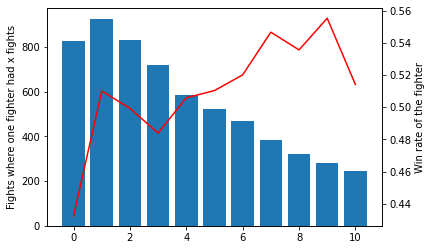

In [24]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(range(11), sample_size)
ax1.set_ylabel("Fights where one fighter had x fights")
ax2.plot(winrates, color="red")
ax2.set_ylabel("Win rate of the fighter")

plt.show()

As expected, the overall trendline increases with more experience, although it doesn't seem to be completely linear.

Let's look at the same graph, but now just for fights where the fighter had more experience than the opponent.

In [25]:
winrates = []
sample_size = []
for m in range(1, 11):
    # Find fights where blue and red had m fights fought previously, while the other one had less.
    f_b = ((data['B_wins'] + data['B_losses'] + data['B_draw'] == m) & (data['R_wins'] + data['R_losses'] + data['R_draw'] < m))
    f_r = ((data['R_wins'] + data['R_losses'] + data['R_draw'] == m) & (data['B_wins'] + data['B_losses'] + data['B_draw'] < m))
    data_first_fights_blue = data[f_b]
    data_first_fights_red = data[f_r]

    wins = 0
    for i in range(len(data_first_fights_blue)):
        if data_first_fights_blue['Winner'].iloc[i] == 'Blue':
            wins += 1
    for i in range(len(data_first_fights_red)):
        if data_first_fights_red['Winner'].iloc[i] == 'Red':
            wins += 1
    total_fights = len(data_first_fights_red) + len(data_first_fights_blue)
    if total_fights > 0:
        p = wins / total_fights
    else:
        p = 0
    winrates.append(p)
    sample_size.append(total_fights)

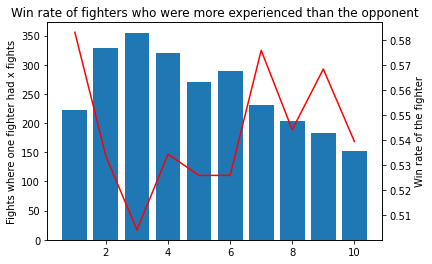

In [26]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = range(1, 11)
ax1.bar(x, sample_size)
ax1.set_title("Win rate of fighters who were more experienced than the opponent")
ax1.set_ylabel("Fights where one fighter had x fights")
ax2.plot(x, winrates, color="red")
ax2.set_ylabel("Win rate of the fighter")

plt.show()

While this result again isn't completely clear, it seems that on 1 fight you have really high chances of winning if your opponent has less experience than you (this means they are fighters making their debut), while next fights you'll have harder time winning. As experience grows, so does the win rate (although note that this is win rate against less experienced opponents), although either due to unpredictable nature of MMA or small sample sizes, it's not very linear.

As all results however are over 50% (at least for the fights we observed), we can confidently say that having more experience than your opponent gives you an edge.